# Agenda

1. What is machine learning?
2. What is `sklearn`, and how does it fit into this world?
3. Classification (iris)
4. Building a model
5. Fitting and predicting -- what do these mean?
6. Testing our model using split-testing
7. Testing our model is more sophisticated ways
8. Building other models and testing them -- and comparing them

# What is data science?

I personally say that data science has three big parts:

1. Data engineering -- getting the data from its original locations into a format that you can use in a serious, practical way.
2. Data analytics -- take data that describes the past, and understand that past -- how many people bought my courses? How many people used my Web site? How many people, on Sunday at 12 noon, are buying my product? How many people, at a given time of day, are trying (unsuccessfully) to log into my system?
3. Machine learning -- let's take data that we already have and use it to make predictions about the future. Machine learning has many, many uses and applications.

# Types of machine learning

- Supervised learning
    1. Classification -- given an item and several categories, how would we categorize this item?
        - Spam or not spam?
        - Insurance -- accept or reject?
        - Credit-card applications and also purchases
    2. Regression -- given some data, what number would we associate with it?
        - How much do we think a certain stock will be worth?
        - Predict scores?
- Unsupervised learning
    3. Clustering (Automatic classification)
    4. Dimensionality reduction (Parameter simplification)

# What is sklearn?

Python's "scipy stack" includes a bunch of different packages:

- NumPy, which provides us with fast, efficient numeric calculations
- Pandas, which is an easier to use version of NumPy
- SciPy, which provides us with a bunch of useful functionality for statistics, etc.
- SciPy has the ability to use plugins, known as "scikits," and one of those is scikit-learn, for machine learning.

You can install those with `pip`:

    pip install -U numpy pandas sklearn matplotlib

# What will we do?

- We'll get some data
- We'll teach the computer which data goes into which category (supervised learning)
- Then we'll show some new data to the computer
- It'll put that data into the right category

# Iris dataset

The most famous dataset in data science is the "iris" data set. It contains measurements of 150 different types of irises (purple flowers). Each flower has been measured in four different ways:

- Petal length + width 
- Sepal length + width

Based on these four measurements, can we predict which of three types of irises we have?

# Terminology

We're going to create a model. That model will be trained with our iris data. Then we'll be able to ask the model for a prediction.

- Inputs to the model can be called X, independent variables, inputs.
- Outputs from the model can be called y, dependent variables, outputs, target.

We're going to take some iris data, and train a model with it.

In [1]:
# sklearn comes with a bunch of sample data sets

from sklearn.datasets import load_iris   # this imports a function that will then load the data set

iris = load_iris()    # now I've loaded the data set into the "iris" variable

In [3]:
# what does it contain?

type(iris)   # this is a Bunch object, which is designed for sklearn sample data usage. It's basically a module with standardized attribute names

sklearn.utils._bunch.Bunch

In [4]:
dir(iris)   # what attributes are in this bunch?

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
# let's look at the description of this model

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
iris.data  # NumPy array of 150x4

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris.data_module   # what is the (string) name of the module from which we read it?

'sklearn.datasets.data'

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# where are the outputs? Those are on iris.target
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names  # here are the names for these three classification numbers

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
iris.frame

In [13]:
# Modern versions of sklearn will produce (not just work with) Pandas data frames

iris = load_iris(as_frame=True)

In [14]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
# the "frame" attribute contains a data frame with *all* of the columns -- inputs and outputs
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Let's create a model!

People talk nonstop about "algorithms." An algorithm is a recipe for what code should execute, an extended formula or set of formulas. Choosing an algorithm is certain important, because each one will figure out the connections between the inputs and the output in a different way. 

But an algorithm is not a model! A model is an algorithm + data.  When we want to create a model:

- We will choose an algorithm, and create a model with it
- We will tune that model with parameters
- We will train the model with data
- We'll test the model
- Then we go back and try again

# Algorithm: K Nearest Neighbors 

Our data (irises) has four columns. We're going to ask sklearn to plot each point in 4-dimensional space, and to mark the category as well. We will thus have 150 points in 4-dimensional space.

If we then have a new flower that we want to classify, we plot it in that 4-dimensional space. We then ask the 5 nearest neighbors: What type are you? We take a vote, and the majority wins, and determines the new point's classification.

Why do we call it K Nearest Neighbors? Because we can choose how many neighbors we survey. By default, k=5. You want it to be an odd number, so that there will be a clear victor in the voting.

In [18]:
from sklearn.neighbors import KNeighborsClassifier 

In [19]:
# KNeighborsClassifier is a Python class
# we will create an instance of this class to create a new, "naked" model (untrained)
# then we will train it
# then we can make predictions with it

model = KNeighborsClassifier()

# when you fit your model, you have to pass both X (feature matrix) and y (the target vector)
model.fit(iris.data, iris.target)

KNeighborsClassifier()

In [22]:
# now we can ask it to make predictions
# in other words, now we can pass a list of flower specifications
# and ask it to predict the class of iris that the flower should be in

from pandas import DataFrame, Series
silly_iris_x = DataFrame([[1,2,3,4],
                          [5,6,7,8]],
                         columns=iris.data.columns)

model.predict(silly_iris_x)  # the output will be two numbers, one for each flower I entered, with its prediction

array([1, 2])

In [23]:
silly_iris_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1,2,3,4
1,5,6,7,8


In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Is my model good?

How can I tell if my model is actually making accurate predictions?

- If I enter a ridiculous flower, then the result is also ridiculous
- If I enter an actual flower, then I don't know the result

The answer is: We can test with our existing data! What if we test with X (our input data) and check it against y (our target list)?

In [25]:
# let's get predictions for our y
# we'll feed in iris.data, and then we can compare y_pred with our y

y_pred = model.predict(iris.data)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# how can I compare y_pred with iris.target?

(iris.target == y_pred).value_counts(normalize=True)

target
True     0.966667
False    0.033333
Name: proportion, dtype: float64

# What's going on?

- I trained the model with iris.data and iris.target
- I then fed iris.data into the model
- The results I got back were similar to iris.target, but not identical

Remember that when we trained our data, it took each of our 150 flowers and plotted it in 4-dimensional space. Then we took each flower, plotted it again (one at a time), and asked which classification it should get, given its 5 closest neighbors. What if we have a flower that is an outlier? What if a flower is a setosa in a field of virginicas? Then we'll get the "wrong" classification.



<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

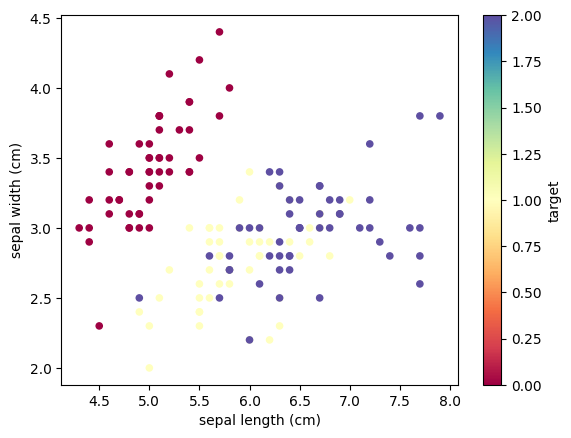

In [31]:
# let's create some scatterplots with our flower data

iris.frame.plot.scatter(x='sepal length (cm)', 
                        y='sepal width (cm)',
                        c='target',
                       colormap='Spectral')

In [32]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

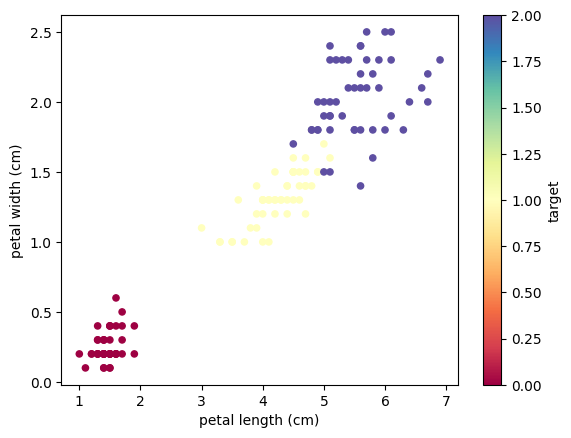

In [34]:
iris.frame.plot.scatter(x='petal length (cm)', 
                        y='petal width (cm)',
                        c='target',
                       colormap='Spectral',
                       legend=True)

# Exercise: Create a simple KNN model for irises

1. Load up the `iris` data
2. Create a `KNeighborsClassifier` model
3. Invoke `fit` on it with the `iris` data
4. Invoke `predict` on it with the `iris` data
5. Do you get the same results as I did?

In [40]:
# VS

from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris(as_frame=True)
iris_df = iris.frame

# Access the features and target
X = iris.data
y = iris.target

# Print the feature names
print(iris.feature_names)

# Print the target names
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(iris.data, iris.target)

KNeighborsClassifier()

In [42]:
# Create your DataFrame
import pandas as pd

silly_iris = pd.DataFrame([[1, 2, 3, 4],
                           [5, 6, 7, 8]],
                          columns=iris_df.columns[:-1])  # Exclude the target column

# Assuming you have a trained model named 'model'
# Make predictions
predictions = model.predict(silly_iris)
predictions

array([1, 2])

In [44]:
y_pred = model.predict(iris.data)
(iris.target == y_pred).value_counts(normalize=True)

target
True     0.966667
False    0.033333
Name: proportion, dtype: float64

In [46]:
# sklearn comes with a function that will measure how well our model did
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, iris.target)

0.9666666666666667

# Better testing of our model

The good news is that we have a model, and when we predict with the input data (X), we get a pretty good accuracy rate.  But it's not perfect, and there is a fundamental flaw here: We know that it predicts well on data that it was trained with.

How well will it do with data it hasn't seen before?

Again, we have a problem: If we get data that the model hasn't seen before, then how can we know if the model really works?

The solution is to lie to the model.

- We'll train it with *most* of our data
- We'll test it with the data we didn't use for training

That way, we know that the model is able to predict on inputs it hasn't seen before. But we are able to check if those predictions are accurate.

The other reason we want to check predictions with non-fitting data is to avoid *overfitting*. The model might be perfect on data used in training, and awful on data not used in training. We must check our model with previously unseen data to avoid this sort of problem.

How, then, will we choose which data will be left out?

We can ask sklearn to do this for us, using train_test_split -- a function meant for precisely this kind of thing.

In [47]:
from sklearn.model_selection import train_test_split

# `train_test_split`

This function takes two arguments:

- X, the feature matrix
- y, a parallel target vector

It returns a tuple of *four* values:

- `X_train` -- a matrix with about 3/4 of the values from `X`
- `X_test` -- a matrix with the other 1/4 values from `X`
- `y_train` -- a vector with 3/4 of the values from `y` -- MUST BE THE SAME ROWS as in `X_train`
- `y_test` -- a vector with 1/4 of the values from `y`, parallel to `X_test`

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [49]:
type(X_train)

pandas.core.frame.DataFrame

In [50]:
type(y_train)

pandas.core.series.Series

In [51]:
# train the model with our training data
model.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
# now predict with X_test
y_pred = model.predict(X_test)    

# now find out how good our model is, comparing y_pred with y_test
accuracy_score(y_pred, y_test)

0.9736842105263158

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)    
accuracy_score(y_pred, y_test)

0.9736842105263158

# Exercise: 

1. Replicate what I've done with `train_test_split`. Do you see that every time you run it, you get a (slightly) different answer.
2. Run this whole set of code 20 times, and get the mean and std of these scores. How well, on average, does our model do?

In [60]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [61]:
all_scores = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    all_scores.append(accuracy_score(y_pred, y_test))

Series(all_scores).describe()

count    100.000000
mean       0.960526
std        0.025506
min        0.894737
25%        0.947368
50%        0.947368
75%        0.973684
max        1.000000
dtype: float64

# Hyperparameters

When we created our model, we used the algorithm's defaults and then loaded in our X and y. But each algorithm has a number of different "hyperparameters" that you can change and tune, so as to affect its work and (hopefully) improve its accuracy.

In the case of KNeighborsClassifier, there are a number of hyperparameters, including n_neighbors, which indicates how many neighbors should be surveyed.

# Exercise

I want you to try values of `n_neighbors` from 1 through 23 (only odd numbers). For each value of `n_neighbors`, do 100 iterations of `train_test_split`, with fitting and predicting, and getting the mean + std for each. 

In other words, you'll create 100 models for each value of `n_neighbors`, and then show which value of `n_neighbors` was, on average, the best. We always want the highest mean and the lowest std. 

In [62]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

In [69]:
final_measures = []

for k in range(1, 24, 2):
    print(k, end=' ')
    all_scores = []
    
    for i in range(100):
        model = KNeighborsClassifier(n_neighbors=k)
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)    
        all_scores.append(accuracy_score(y_pred, y_test))

    final_measures.append({'k':k,
                          'mean': Series(all_scores).mean(),
                          'std': Series(all_scores).std()})

print(final_measures)            

1 3 5 7 9 11 13 15 17 19 21 23 [{'k': 1, 'mean': np.float64(0.9560526315789472), 'std': np.float64(0.029226339288311996)}, {'k': 3, 'mean': np.float64(0.963421052631579), 'std': np.float64(0.022409428589705644)}, {'k': 5, 'mean': np.float64(0.9636842105263157), 'std': np.float64(0.026390113013382843)}, {'k': 7, 'mean': np.float64(0.9636842105263157), 'std': np.float64(0.028184575493615974)}, {'k': 9, 'mean': np.float64(0.9673684210526315), 'std': np.float64(0.027003248149358894)}, {'k': 11, 'mean': np.float64(0.9689473684210526), 'std': np.float64(0.026548677106002744)}, {'k': 13, 'mean': np.float64(0.9663157894736841), 'std': np.float64(0.025935584108904054)}, {'k': 15, 'mean': np.float64(0.9571052631578947), 'std': np.float64(0.031661905918782034)}, {'k': 17, 'mean': np.float64(0.9586842105263156), 'std': np.float64(0.027038197122594573)}, {'k': 19, 'mean': np.float64(0.9534210526315787), 'std': np.float64(0.03662024029053791)}, {'k': 21, 'mean': np.float64(0.9505263157894736), 'std'

In [71]:
from pandas import DataFrame

DataFrame(final_measures).sort_values(['mean', 'std'], ascending=False)

,k,mean,std
5,11,0.968947,0.026549
4,9,0.967368,0.027003
6,13,0.966316,0.025936
3,7,0.963684,0.028185
2,5,0.963684,0.026390
1,3,0.963421,0.022409
8,17,0.958684,0.027038
7,15,0.957105,0.031662
0,1,0.956053,0.029226
9,19,0.953421,0.036620


# Next up

- Better testing
- Trying other models (with our better testing)

Resume at :30

# Testing a model

Given that we will *always* want to train-test-split a model, shouldn't there be functionality that does this for us?

Yes -- there is a function in `sklean`, `cross_val_score`, that does what we just did, automatically. It takes a model, and then re-trains it and re-tests it with a wide variety of training and testing data, given a data set. It then tells us, on average, which model did best.

In [73]:
# In this code:
# - We create a "naked" KNN model
# - cross_val_score then chooses 4/5 for training and 1/5 for testing
# - we then get the accuracy_score (just like we calculated) for each of these runs
# - we get back a NumPy array, from which we can get mean/std

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

model = KNeighborsClassifier()

results = cross_val_score(model, X, y, cv=5)

print(results.mean())
print(results.std())

0.9733333333333334
0.02494438257849294
